# Recommendation Chatbot API: llama2 vs llama3 ensemble evaluation analisys 

In [1]:
%%capture output
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

BASE_PATH         = '../..'
API_PATH          = f'{BASE_PATH}/chat-bot-api'
LIB_PATH          = f'{BASE_PATH}/lib'
METRICS_PATH      = f'{BASE_PATH}/metrics'

sys.path.append(LIB_PATH)
sys.path.append(API_PATH)

In [3]:
import logging
import os
import pytorch_common.util as pu
import util as ut
from client import RecChatBotV1ApiClient
from models import EvaluationState
import seaborn as sns
import pandas as pd
from models.evaluation import (
    plot_mean_ndcg_evolutions, 
    plot_mean_avg_precision_evolutions, 
    plot_mean_reciprocal_rank_evolutions,
    plot_mean_recall_evolutions
)
import matplotlib.pyplot as plt
import numpy as np

import data.plot as dp

import metric as mt

<Figure size 640x480 with 0 Axes>

## Setup

In [4]:
def on_file(file_path, format='%(asctime)s - %(levelname)s - %(message)s'):
    handler = logging.FileHandler(file_path)
    handler.setFormatter(logging.Formatter(format))
    return handler


pu.LoggerBuilder() \
    .handler(on_file('./evaluation.log'))\
    .on_console() \
    .build()

<RootLogger root (INFO)>

In [5]:
llama2_sessions = EvaluationState.load(f'{METRICS_PATH}/llama2-evaluation-metrics.dt').sessions
llama3_sessions = EvaluationState.load(f'{METRICS_PATH}/llama3-evaluation-metrics.dt').sessions

## Metrics evolution comparation

### Mean Normalized Discounted Cumulative Gain (Mean NDCG)

(0.96, 0.9825)

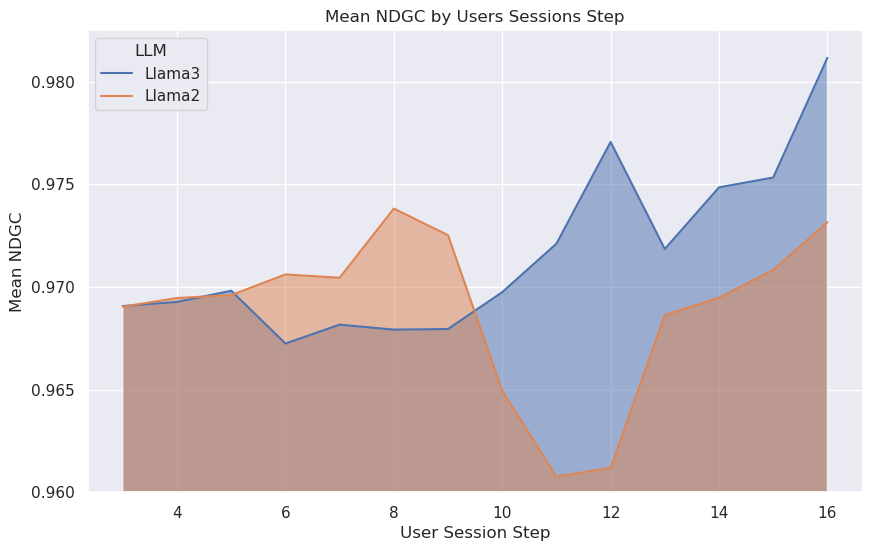

In [108]:
plot_mean_ndcg_evolutions(
    llama2_sessions, 
    llama3_sessions,
    min_sessions_by_step = 7,
    moving_avg_window = 3,
)
plt.ylim(0.960, 0.9825)

**Consideraciones**

* La gráfica muestra el valor promedio de NDCG (Normalized Discounted Cumulative Gain) a lo largo de diferentes pasos de sesión del usuario.
* Solo se consideran los pasos para los cuales hubo al menos 10 sesiones, asegurando así que las medidas de NDCG sean representativas.

**Comparación entre Llama3 y Llama2**

* Llama3 (en azul) tiene un rendimiento superior en la mayoría de los puntos en comparación con Llama2 (en naranja).
Hay una notable diferencia a partir del paso 12, donde Llama3 muestra un aumento significativo en el valor de NDCG mientras que Llama2 tiene una tendencia más estable.

**Tendencias por pasos de sesión**

* Hasta el paso 10, ambos modelos tienen rendimientos similares con ligeras variaciones.
* A partir del paso 10, Llama3 comienza a destacar con un aumento considerable en el rendimiento, alcanzando su punto máximo en el paso 16.
* Llama2 muestra una caída en su rendimiento alrededor del paso 10, pero se recupera ligeramente después.

**Observaciones Clave**

* **Consistencia**: Llama3 parece ser más consistente y muestra una tendencia al alza, especialmente en los pasos finales.
* **Pico de rendimiento**: Llama3 alcanza un rendimiento máximo en el paso 16, lo cual podría indicar una mejora significativa en sesiones más largas.
* **Caída temporal**: Ambos modelos experimentan una caída alrededor del paso 10, lo cual podría ser un punto interesante para investigar más a fondo en términos de comportamiento del usuario o problemas en los modelos.


### Mean Average Precision

(0.4, 0.61)

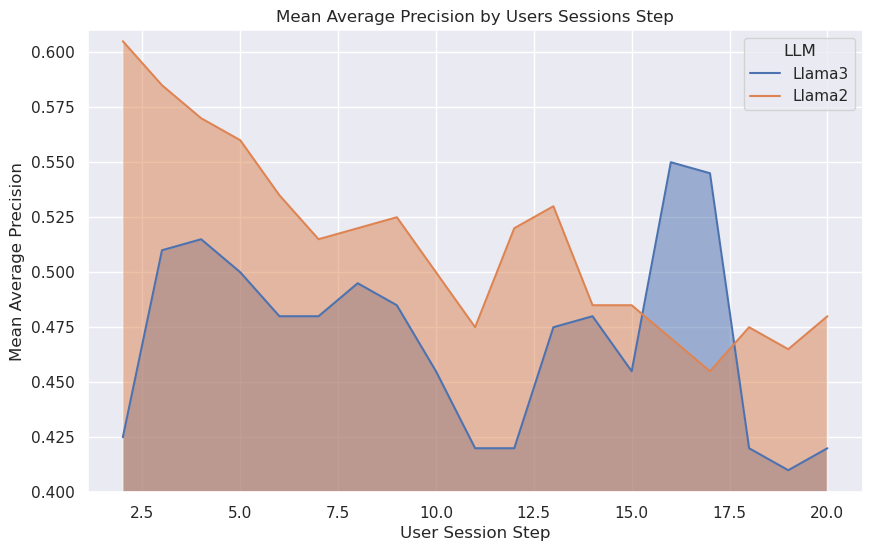

In [68]:
plot_mean_avg_precision_evolutions(
    llama2_sessions, 
    llama3_sessions, 
    moving_avg_window = 2,
    min_sessions_by_step = 3
)
plt.ylim(0.40, 0.61)

**Consideraciones**

* La gráfica muestra el valor promedio de la Precisión Media (Mean Average Precision - MAP) a lo largo de diferentes pasos de sesión del usuario.
Al igual que el gráfico anterior, se comparan dos modelos de lenguaje (LLMs): Llama3 y Llama2.
* Solo se consideran los pasos para los cuales hubo al menos 3 sesiones, asegurando así que las medidas de MAP sean representativas.

**Comparación entre Llama3 y Llama2**

* Llama2 (en naranja) tiene un rendimiento generalmente superior en comparación con Llama3 (en azul) en la mayoría de los pasos.
* Hay algunas excepciones notables, como en los pasos 15 y 16, donde Llama3 muestra un aumento en MAP que supera a Llama2.

**Tendencias por Pasos de Sesión**

* **Llama2**: Muestra una tendencia general a la baja desde el paso 2.5 hasta el paso 20, con algunas fluctuaciones menores.
* **Llama3**: Muestra una tendencia más variable con picos en los pasos 5, 15 y 18.
* Ambos modelos tienen una caída en el rendimiento en torno al paso 10.

**Observaciones Clave**

* **Dominio de Llama2**: En la mayoría de los pasos, Llama2 tiene un rendimiento superior en términos de MAP.
* **Picos en Llama3**: Aunque Llama3 generalmente tiene un rendimiento más bajo, presenta picos significativos en los pasos 15 y 18.
* **Tendencias Descendentes**: Ambos modelos muestran una tendencia general a la baja en MAP a medida que avanzan los pasos de sesión.
* **Paso 10**: Al igual que en el gráfico anterior, ambos modelos muestran una caída alrededor del paso 10.

**Conclusiones**

* Comparando ambos gráficos (NDCG y MAP), Llama3 muestra una mejora significativa en términos de NDCG en las sesiones más largas, mientras que Llama2 parece tener un rendimiento más constante pero generalmente superior en términos de MAP.
* Este comportamiento sugiere que Llama3 puede estar mejor optimizado para ciertos tipos de relevancia y precisión en sesiones más largas, mientras que Llama2 tiene un rendimiento más equilibrado en sesiones cortas y medianas.

### Mean Reciprocal Rank

(0.68, 0.98)

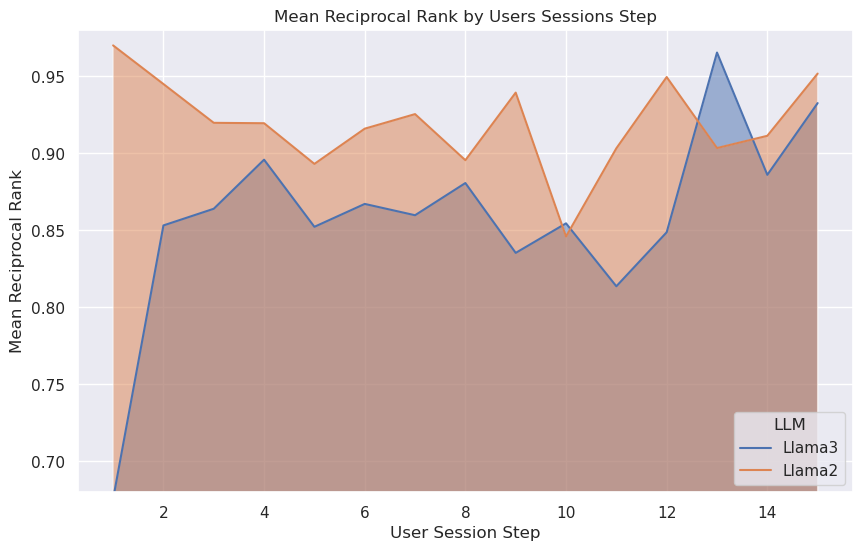

In [84]:
plot_mean_reciprocal_rank_evolutions(
    llama2_sessions,
    llama3_sessions,
    moving_avg_window = 1,
    min_sessions_by_step = 10
)
plt.ylim(0.68, 0.98)

**Consideraciones**

* La gráfica muestra el valor promedio del Rango Recíproco Medio (Mean Reciprocal Rank - MRR) a lo largo de diferentes pasos de sesión del usuario.
* Solo se consideran los pasos para los cuales hubo al menos 10 sesiones, asegurando así que las medidas de MRR sean representativas.


**Comparación entre Llama3 y Llama2**

* Llama2 (en naranja) generalmente tiene un rendimiento superior en comparación con Llama3 (en azul) en la mayoría de los pasos.
* Hay algunas excepciones notables, como en los pasos 12 y 14, donde Llama3 muestra un aumento en MRR que supera a Llama2.

**Tendencias por Pasos de Sesión**

* **Llama2**: Muestra un rendimiento consistentemente alto con algunos altibajos menores, manteniéndose generalmente por encima de 0.85.
* **Llama3**: Muestra una tendencia más variable con picos en los pasos 4, 12 y 14, y algunos descensos notables.

**Observaciones Clave**

* **Dominio de Llama2**: En la mayoría de los pasos, Llama2 tiene un rendimiento superior en términos de MRR.
* **Picos en Llama3**: Aunque Llama3 generalmente tiene un rendimiento más bajo, presenta picos significativos en los pasos 12 y 14.
* **Consistencia de Llama2**: Llama2 muestra una consistencia notable en su rendimiento, manteniéndose alrededor de 0.9 en la mayoría de los pasos.
* **Paso 10**: Similar a los gráficos anteriores, ambos modelos muestran fluctuaciones alrededor del paso 10, lo cual podría ser un punto interesante para investigar más a fondo.

**Consistencia entre Métricas**

* Comparando los tres gráficos (NDCG, MAP y MRR), Llama3 muestra una variabilidad en su rendimiento, con picos en sesiones más largas y en ciertos puntos específicos, mientras que Llama2 tiene un rendimiento más equilibrado y consistente en todas las métricas.
* Este comportamiento sugiere que Llama3 puede estar mejor optimizado para ciertos tipos de relevancia y precisión en pasos específicos, mientras que Llama2 ofrece un rendimiento más constante y confiable.

### Mean Recall

#### ¿Cómo se calcula el Recall Promedio?
La evaluación del modelo se realiza utilizando un conjunto de pruebas que contiene usuarios y sus interacciones con películas. Estas interacciones son las calificaciones que realizan sobre las películas. Para evaluar el modelo, se consulta al mismo en lenguaje natural con un prompt que contiene los nombres de 5 películas. Luego, el modelo devuelve una lista de candidatos que puede o no contener estas películas. El *Recall* es una forma de medir el grado de captura del modelo, es decir, cuántas de las 5 películas consultadas aparecen en el resultado.
Posteriormente, se calcula el *Recall* para cada una de estas consultas o pasos de una sesión de usuario y finalmente se realiza el promedio total.


(0.4, 0.68)

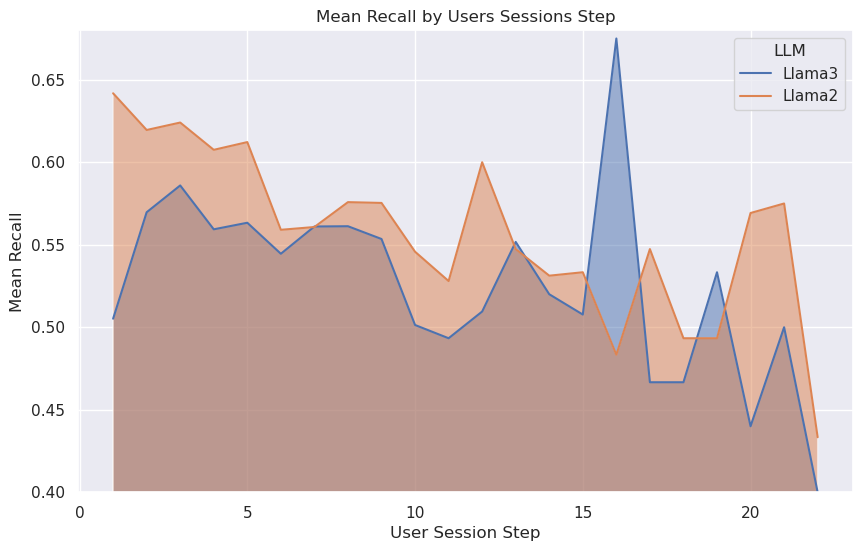

In [109]:
plot_mean_recall_evolutions(
    llama2_sessions, 
    llama3_sessions, 
    moving_avg_window = 1,
    min_sessions_by_step = 1    
)
plt.ylim(0.4, 0.68)

**Consideraciones**

* La gráfica muestra el valor promedio de Recall (Mean Recall) a lo largo de diferentes pasos de sesión del usuario.
* Se comparan dos modelos de lenguaje (LLMs): Llama3 y Llama2.


**Comparación entre Llama3 y Llama2**

* Llama2 (en naranja) generalmente tiene un rendimiento superior en comparación con Llama3 (en azul) en la mayoría de los pasos.
* Hay algunas excepciones notables, como en el paso 16, donde Llama3 muestra un aumento en Recall que supera a Llama2.

**Tendencias por Pasos de Sesión**

* Llama2: Muestra una tendencia general a la baja desde el paso 1 hasta el paso 22, con algunas fluctuaciones menores.
* Llama3: Muestra una tendencia más variable con picos en los pasos 3, 16 y 21, y algunos descensos notables.

**Observaciones Clave**

* Dominio de Llama2: En la mayoría de los pasos, Llama2 tiene un rendimiento superior en términos de Recall.
* Picos en Llama3: Aunque Llama3 generalmente tiene un rendimiento más bajo, presenta picos significativos en los pasos 16 y 21.
* Tendencias Descendentes: Ambos modelos muestran una tendencia general a la baja en Recall a medida que avanzan los pasos de sesión.


**Consistencia entre Métricas**

* Comparando los cuatro gráficos (NDCG, MAP, MRR y Recall), Llama3 muestra una variabilidad en su rendimiento, con picos en sesiones más largas y en ciertos puntos específicos, mientras que Llama2 tiene un rendimiento más equilibrado y consistente en todas las métricas.
* Este comportamiento sugiere que Llama3 puede estar mejor optimizado para ciertos tipos de relevancia y precisión en pasos específicos, mientras que Llama2 ofrece un rendimiento más constante y confiable.

## Mean/Median difference tests

### Mean Average Precision (MAP)

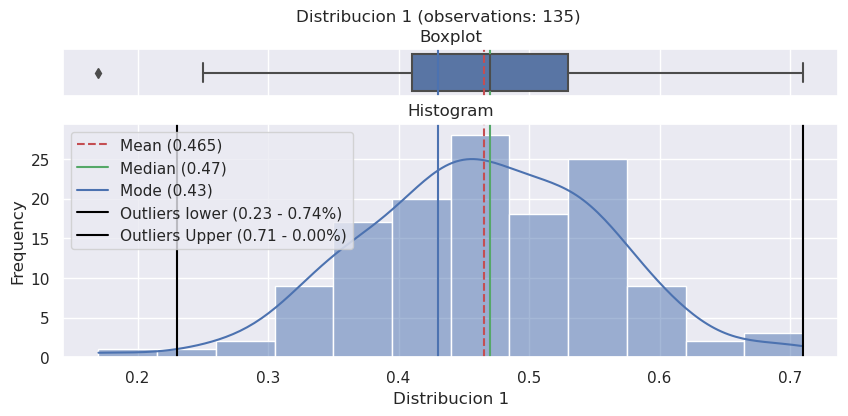

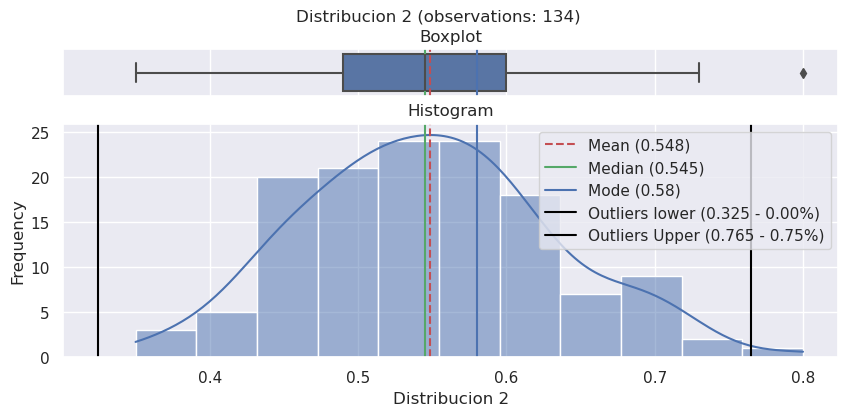



Prueba T-Student de diferencia de medias entre las distribuciones 1 y 2:

- Tamaño de las muestras: Dist1(135), Dist2(134).
- Se cumples los supuestos de normalidad y homogeneidad de las varianzas.
- Estadístico: 0.7845910013042203
- P-value: 0.3765377652803321
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medias de las distribuciones.

Supuestos:

    Prueba de normalidad para distribución 1:
    - Estadístico: 0.9936274886131287
    - P-value: 0.8098332285881042

    Prueba de normalidad para distribución 2:
    - Estadístico: 0.9907048940658569
    - P-value: 0.5161412358283997

    Prueba de homogeneidad de varianzas:
    - Estadístico: 0.7845910013042203
    - P-value: 0.3765377652803321

    Resultados:
    - Se cumple el supuesto de normalidad de ambas distribuciones.
    - Se cumple el supuesto homogeneidad de las varianzas de las distribuciones.

In [100]:
mt.TStudentTest()(llama3_sessions.mean_average_precision, llama2_sessions.mean_average_precision)

In [101]:
mt.MannWhitneyWilcoxonTest()(llama3_sessions.mean_average_precision, llama2_sessions.mean_average_precision)



Prueba de Mann Whiney - Wilcoxon para la comparación de medianas:

- Tamaño de las muestras: Dist1(135), Dist2(134).
- Estadístico: 4572.0
- P-value: 2.298721460434994e-12 (<0.05)
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medianas de los grupos.

**Forma de las distribuciones**

* Ambas distribuciones parecen ser aproximadamente normales, pero con algunas desviaciones.
* La Distribución 1 tiene una ligera asimetría positiva (cola hacia la derecha).
* La Distribución 2 parece ser más simétrica que la Distribución 1.

**Medidas de tendencia central**

* Distribución 1: Media (0.465), Mediana (0.47), Moda (0.43)
* Distribución 2: Media (0.548), Mediana (0.545), Moda (0.58)
* Se observa que la Distribución 2 tiene valores centrales más altos que la Distribución 1.

**Dispersión**

La Distribución 2 parece tener una mayor dispersión que la Distribución 1, como se evidencia en los boxplots más amplios.

**Outliers**

* Ambas distribuciones tienen outliers, pero son más pronunciados en la Distribución 2.
* Distribución 1: Outliers inferiores (0.23 - 0.74), superiores (0.71 - 0.00)
* Distribución 2: Outliers inferiores (0.325 - 0.00), superiores (0.765 - 0.75)

Dadas estas observaciones, podemos entender mejor por qué las pruebas t-test y Mann-Whitney-Wilcoxon dieron resultados diferentes:

* La presencia de outliers y la ligera asimetría podrían afectar más al t-test que a la prueba de Mann-Whitney-Wilcoxon.
* Aunque las distribuciones se aproximan a la normalidad, las desviaciones podrían ser suficientes para afectar los resultados del t-test.

En conclusión, las gráficas respaldan la idea de que hay una diferencia entre las dos distribuciones, especialmente en términos de sus medianas. La prueba de Mann-Whitney-Wilcoxon parece ser más apropiada para estos datos debido a la presencia de outliers y las ligeras desviaciones de la normalidad.

### Mean Reciprocal Rank (MRR)

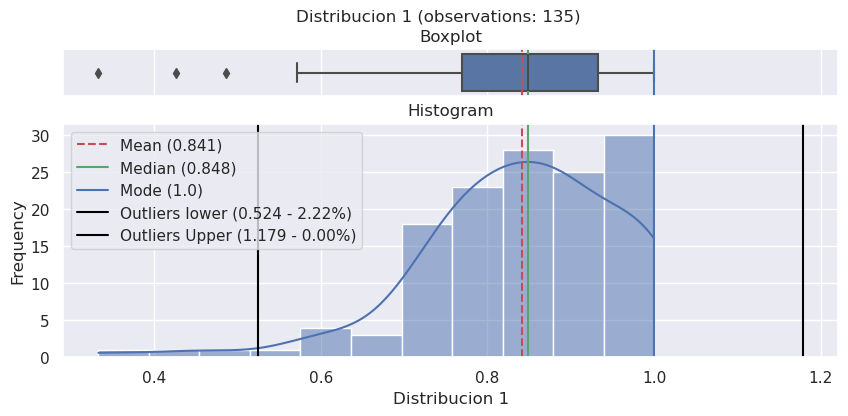

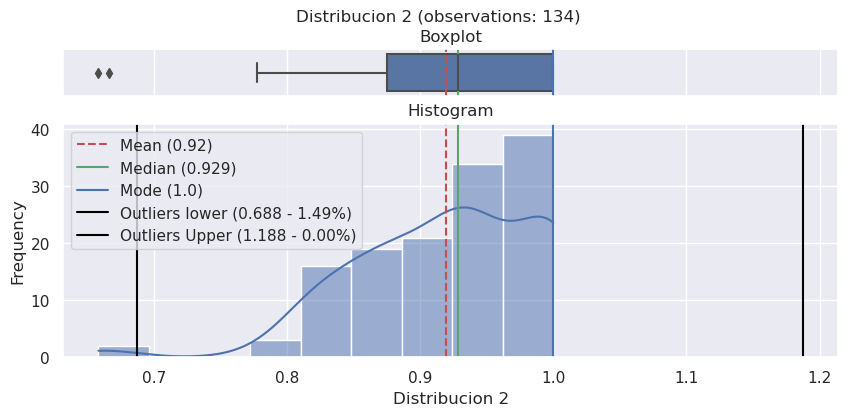



Prueba T-Student de diferencia de medias entre las distribuciones 1 y 2:

- Tamaño de las muestras: Dist1(135), Dist2(134).
- No se cumples todos los supuestos.
- Estadístico: 24.327301798731856
- P-value: 1.430799428680198e-06
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medias de las distribuciones.

Supuestos:

    Prueba de normalidad para distribución 1:
    - Estadístico: 0.9238792657852173
    - P-value: 1.2105667792638997e-06

    Prueba de normalidad para distribución 2:
    - Estadístico: 0.9080171585083008
    - P-value: 1.4868116693378397e-07

    Prueba de homogeneidad de varianzas:
    - Estadístico: 24.327301798731856
    - P-value: 1.430799428680198e-06

    Resultados:
    - No se cumple el supuesto de normalidad una o ambas distribuciones.
    - No se cumple el supuesto homogeneidad de las varianzas de las distribuciones.

In [102]:
mt.TStudentTest()(
    llama3_sessions.mean_reciprocal_rank,
    llama2_sessions.mean_reciprocal_rank
)

In [103]:
mt.MannWhitneyWilcoxonTest()(llama3_sessions.mean_reciprocal_rank, llama2_sessions.mean_reciprocal_rank)



Prueba de Mann Whiney - Wilcoxon para la comparación de medianas:

- Tamaño de las muestras: Dist1(135), Dist2(134).
- Estadístico: 5294.0
- P-value: 3.5371681997254583e-09 (<0.05)
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medianas de los grupos.

**Observaciones**

1. **Distribuciones**
   - Distribución 1: Media (0.841), Mediana (0.848), Moda (1.0)
   - Distribución 2: Media (0.92), Mediana (0.929), Moda (1.0)
   - Ambas distribuciones muestran una ligera asimetría negativa (cola hacia la izquierda).

2. **Prueba T-Student**:
    Rechaza la hipótesis nula (p-value = 1.430799e-06 < 0.05)
   - Indica una diferencia estadísticamente significativa entre las medias.
   - Sin embargo, no se cumplen todos los supuestos necesarios para esta prueba.

3. **Supuestos de la Prueba T**
   - Normalidad: Ambas distribuciones fallan la prueba de normalidad (p-values < 0.05)
   - Homogeneidad de varianzas: No se cumple (p-value = 1.430799e-06 < 0.05)

4. **Prueba de Mann-Whitney-Wilcoxon**
   - Rechaza la hipótesis nula (p-value = 3.537168e-09 < 0.05)
   - Indica una diferencia estadísticamente significativa entre las medianas.

**Conclusiones**

1. **Diferencia significativa**: Ambas pruebas (T-Student y Mann-Whitney-Wilcoxon) indican que hay una diferencia estadísticamente significativa entre las dos distribuciones.

2. **Fiabilidad de las pruebas**
   - La prueba T-Student no es completamente confiable en este caso debido a que no se cumplen los supuestos de normalidad y homogeneidad de varianzas.
   - La prueba de Mann-Whitney-Wilcoxon es más apropiada y confiable para estos datos, ya que no requiere el supuesto de normalidad.

3. **Interpretación de los resultados**
   - Podemos afirmar con confianza que existe una diferencia significativa entre las medianas de las dos distribuciones.
   - La Distribución 2 tiene valores generalmente más altos que la Distribución 1 (mediana de 0.929 vs 0.848).
   - Aunque la prueba T-Student también sugiere una diferencia en las medias, debemos ser cautelosos al interpretar este resultado debido a la violación de los supuestos.

4. **Implicaciones prácticas**
   - La diferencia entre las distribuciones es real y no se debe al azar.
   - El MRR (Mean Reciprocal Rank, asumiendo que es lo que estas métricas representan) es significativamente más alto en la Distribución 2.

5. **Recomendaciones**
   - Dado que ambas pruebas muestran resultados significativos, podemos estar bastante seguros de la diferencia entre las distribuciones.
   - Sin embargo, al reportar estos resultados, es mejor enfocarse en la prueba de Mann-Whitney-Wilcoxon y en la comparación de medianas, ya que es más robusta dada la naturaleza de los datos.

Por lo tanto, hay una diferencia estadísticamente significativa entre las dos distribuciones, con la Distribución 2 mostrando valores de MRR generalmente más altos. Esta conclusión se basa principalmente en la prueba de Mann-Whitney-Wilcoxon, que es más apropiada para estos datos.

### Recall

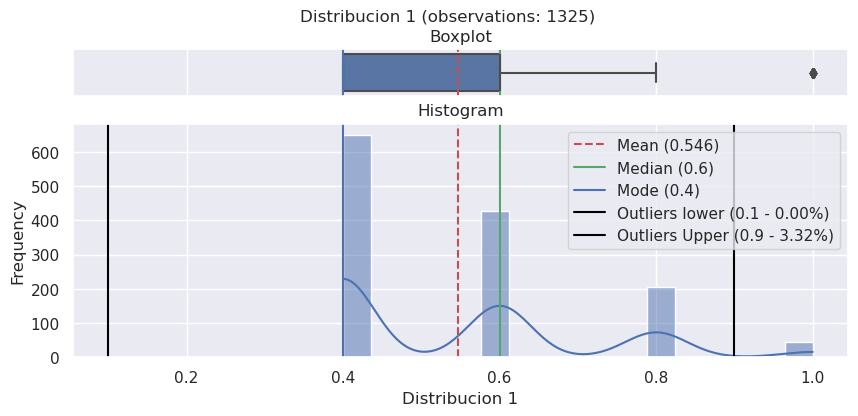

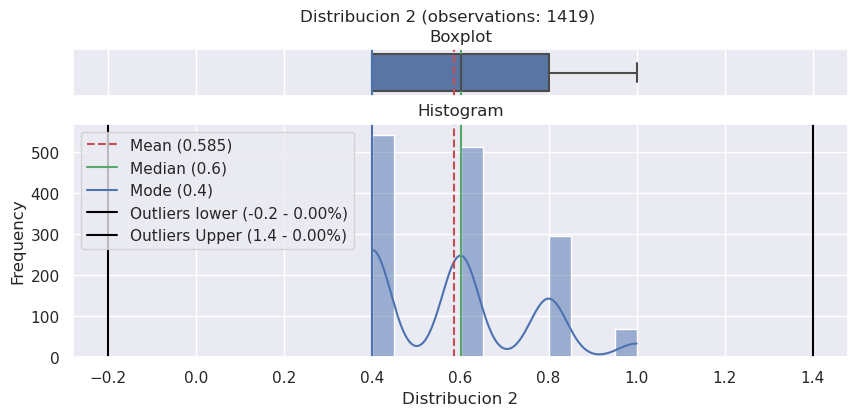



Prueba T-Student de diferencia de medias entre las distribuciones 1 y 2:

- Tamaño de las muestras: Dist1(1325), Dist2(1419).
- No se cumples todos los supuestos.
- Estadístico: 1.4153822597310615
- P-value: 0.2342679604998666
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medias de las distribuciones.

Supuestos:

    Prueba de normalidad para distribución 1:
    - Estadístico: 0.7815212607383728
    - P-value: 8.104219091831431e-39

    Prueba de normalidad para distribución 2:
    - Estadístico: 0.831238329410553
    - P-value: 2.8422818805255164e-36

    Prueba de homogeneidad de varianzas:
    - Estadístico: 1.4153822597310615
    - P-value: 0.2342679604998666

    Resultados:
    - No se cumple el supuesto de normalidad una o ambas distribuciones.
    - Se cumple el supuesto homogeneidad de las varianzas de las distribuciones.

In [104]:
mt.TStudentTest()(llama3_sessions.recall, llama2_sessions.recall)

In [105]:
mt.MannWhitneyWilcoxonTest()(llama3_sessions.recall, llama2_sessions.recall)



Prueba de Mann Whiney - Wilcoxon para la comparación de medianas:

- Tamaño de las muestras: Dist1(1325), Dist2(1419).
- Estadístico: 823819.5
- P-value: 1.935560901485052e-09 (<0.05)
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medianas de los grupos.

**Observaciones**

1. **Distribuciones**
   - Distribución 1: Media (0.546), Mediana (0.6), Moda (0.4)
   - Distribución 2: Media (0.585), Mediana (0.6), Moda (0.4)
   - Ambas distribuciones muestran una forma multimodal, con picos en 0.4, 0.6 y 0.8.

2. **Prueba T-Student**
   - No rechaza la hipótesis nula (p-value = 0.2342679604998666 > 0.05)
   - Indica que no hay una diferencia estadísticamente significativa entre las medias.
   - Sin embargo, no se cumplen todos los supuestos necesarios para esta prueba.

3. **Supuestos de la Prueba T**
   - Normalidad: Ambas distribuciones fallan la prueba de normalidad (p-values < 0.05)
   - Homogeneidad de varianzas: Se cumple (p-value = 0.2342679604998666 > 0.05)

4. **Prueba de Mann-Whitney-Wilcoxon**
   - Rechaza la hipótesis nula (p-value = 1.935560901485052e-09 < 0.05)
   - Indica una diferencia estadísticamente significativa entre las medianas.

**Conclusiones**

1. **Diferencia significativa**
   - La prueba T-Student no indica una diferencia significativa entre las medias.
   - Sin embargo, la prueba de Mann-Whitney-Wilcoxon sí indica una diferencia significativa entre las medianas.

2. **Fiabilidad de las pruebas**
   - La prueba T-Student no es confiable en este caso debido a que no se cumple el supuesto de normalidad.
   - La prueba de Mann-Whitney-Wilcoxon es más apropiada y confiable para estos datos, ya que no requiere el supuesto de normalidad.

3. **Interpretación de los resultados**
   - Podemos afirmar con confianza que existe una diferencia significativa entre las distribuciones de Recall de los dos grupos.
   - Aunque las medianas son iguales (0.6), la distribución general de los valores es diferente.
   - La Distribución 2 tiene una media ligeramente más alta (0.585 vs 0.546), lo que sugiere que tiende a tener valores más altos en general.

4. **Implicaciones prácticas**
   - La diferencia entre las distribuciones es real y no se debe al azar.
   - Aunque las medianas son iguales, la Distribución 2 parece tener un rendimiento de Recall ligeramente mejor en general.

5. **Consideraciones adicionales**
   - Las distribuciones son multimodales, lo que explica por qué fallan las pruebas de normalidad.
   - El gran tamaño de las muestras (1325 y 1419) aumenta la confiabilidad de la prueba de Mann-Whitney-Wilcoxon.

6. **Recomendaciones**
   - Al reportar estos resultados, es mejor enfocarse en la prueba de Mann-Whitney-Wilcoxon.
   - Sería útil investigar más a fondo las razones de los picos en 0.4, 0.6 y 0.8 en ambas distribuciones, ya que podrían revelar información importante sobre el comportamiento del sistema o la naturaleza de los datos.

Por lo tanto, aunque las medianas son iguales, hay una diferencia estadísticamente significativa en la distribución general de los valores de Recall entre los dos grupos. La Distribución 2 tiende a tener valores ligeramente más altos, pero la naturaleza multimodal de ambas distribuciones sugiere que puede haber factores subyacentes que merecen una investigación más profunda.

### Normalized Discounted Cumulative Gain (NDCG)

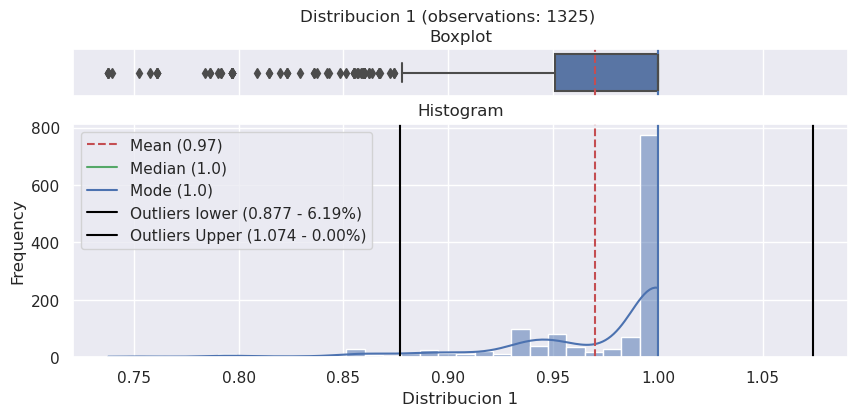

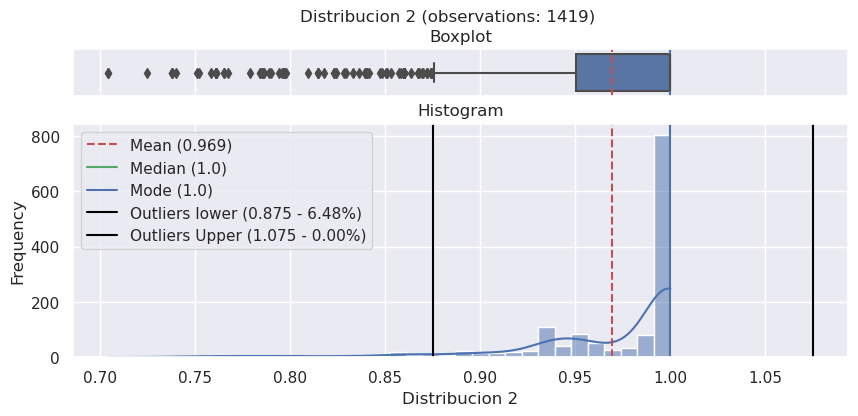



Prueba T-Student de diferencia de medias entre las distribuciones 1 y 2:

- Tamaño de las muestras: Dist1(1325), Dist2(1419).
- No se cumples todos los supuestos.
- Estadístico: 0.2149039745681259
- P-value: 0.6429873683404238
- No se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que existe una diferencia significativa entre las medias de las distribuciones.

Supuestos:

    Prueba de normalidad para distribución 1:
    - Estadístico: 0.6739869713783264
    - P-value: 9.80908925027372e-45

    Prueba de normalidad para distribución 2:
    - Estadístico: 0.6680089831352234
    - P-value: 0.0

    Prueba de homogeneidad de varianzas:
    - Estadístico: 0.2149039745681259
    - P-value: 0.6429873683404238

    Resultados:
    - No se cumple el supuesto de normalidad una o ambas distribuciones.
    - Se cumple el supuesto homogeneidad de las varianzas de las distribuciones.

In [98]:
mt.TStudentTest()(llama3_sessions.ndcg, llama2_sessions.ndcg)

In [99]:
mt.MannWhitneyWilcoxonTest()(llama3_sessions.ndcg, llama2_sessions.ndcg)



Prueba de Mann Whiney - Wilcoxon para la comparación de medianas:

- Tamaño de las muestras: Dist1(1325), Dist2(1419).
- Estadístico: 956660.5
- P-value: 0.3785122248408648 (>=0.05)
- No se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que existe una diferencia estadísticamente significativa entre las medianas de los grupos.

**Observaciones**

1. Distribuciones:
   - Distribución 1: Media (0.97), Mediana (1.0), Moda (1.0)
   - Distribución 2: Media (0.969), Mediana (1.0), Moda (1.0)
   - Ambas distribuciones muestran una fuerte asimetría negativa, con la mayoría de los valores concentrados cerca de 1.0.

2. Prueba T-Student:
   - No rechaza la hipótesis nula (p-value = 0.6429873683404238 > 0.05)
   - Indica que no hay una diferencia estadísticamente significativa entre las medias.

3. Supuestos de la Prueba T:
   - Normalidad: Ambas distribuciones fallan la prueba de normalidad (p-values muy cercanos a 0)
   - Homogeneidad de varianzas: Se cumple (p-value = 0.6429873683404238 > 0.05)

4. Prueba de Mann-Whitney-Wilcoxon:
   - No rechaza la hipótesis nula (p-value = 0.3785122248408648 > 0.05)
   - Indica que no hay una diferencia estadísticamente significativa entre las medianas.

**Conclusion de las observaciones**

1. No hay diferencia significativa: Tanto la prueba T-Student como la prueba de Mann-Whitney-Wilcoxon indican que no hay diferencias significativas entre las dos distribuciones de NDCG.

2. Similitud en las distribuciones: Las medidas de tendencia central (media, mediana, moda) son muy similares entre ambas distribuciones, lo que respalda la conclusión de que no hay diferencias significativas.

3. Concentración de valores altos: Ambas distribuciones muestran una fuerte concentración de valores cerca de 1.0, lo que indica un rendimiento generalmente alto en términos de NDCG para ambos grupos.

4. Violación de normalidad: La fuerte asimetría de las distribuciones explica por qué fallan las pruebas de normalidad, lo que hace que la prueba de Mann-Whitney-Wilcoxon sea más apropiada en este caso.

5. Outliers: Ambas distribuciones tienen outliers en el extremo inferior, pero estos no parecen afectar significativamente los resultados generales.

**Conclusiones generales (incluyendo MRR y Recall)**

1. Variabilidad en las métricas: Mientras que MRR y Recall mostraron diferencias significativas entre las distribuciones, NDCG no muestra tales diferencias.

2. Consistencia en NDCG: El rendimiento en términos de NDCG parece ser consistentemente alto y similar entre ambos grupos, lo que podría indicar una buena calidad general de los resultados en ambos casos.

3. Complejidad del rendimiento: Las diferencias observadas en MRR y Recall, combinadas con la similitud en NDCG, sugieren que el rendimiento de los sistemas o métodos evaluados es complejo y multifacético.

4. Importancia de múltiples métricas: Este análisis demuestra la importancia de evaluar múltiples métricas para obtener una visión completa del rendimiento.

5. Consideraciones prácticas: Aunque se observaron algunas diferencias estadísticamente significativas en MRR y Recall, la similitud en NDCG sugiere que, en la práctica, ambos sistemas o métodos pueden estar funcionando de manera similar en términos de la calidad general de los resultados.

Poro tanto, mientras que las análisis anteriores de MRR y Recall mostraron ligeras ventajas para la Distribución 2, el análisis de NDCG sugiere que ambos sistemas tienen un rendimiento muy similar en términos de la calidad del ranking. Esto resalta la importancia de considerar múltiples métricas al evaluar el rendimiento y sugiere que, aunque hay algunas diferencias, ambos sistemas parecen ser efectivos en general.

## Conclusion Final


### Rendimiento General
   * Llama 2 (Distribución 2) muestra ventajas estadísticamente significativas en MRR y Recall, aunque estas diferencias son pequeñas.
   * Llama 3 (Distribución 1) demuestra un rendimiento más variable a lo largo del tiempo, con picos ocasionales de excelencia.

### Evolución Temporal
   - Llama 2 mantiene un rendimiento más consistente y estable a lo largo de las sesiones, especialmente en MRR y Recall.
   - Llama 3 mejora en sesiones más largas para NDCG, pero muestra mayor variabilidad en otras métricas.

### Fortalezas Específicas
   - Llama 2 destaca en consistencia y en métricas como MRR y Recall, tanto en análisis estadísticos como en evolución temporal.
   - Llama 3 muestra potencial para mejoras significativas en situaciones específicas, especialmente en NDCG en pasos de sesión avanzados.

### Diferencias en NDCG
   - No se encontraron diferencias estadísticamente significativas en NDCG, sugiriendo una calidad similar en el ranking general entre ambos modelos.

### Complejidad del Rendimiento
   - El rendimiento de estos modelos es multifacético, con Llama 2 mostrando ventajas estadísticas y consistencia temporal, mientras que Llama 3 muestra variabilidad y potencial de mejora en ciertas situaciones.

### Implicaciones Prácticas
   - Llama 2 parece ser la opción más sólida para aplicaciones que requieren consistencia y estabilidad, respaldado tanto por análisis estadísticos como por su evolución temporal.
   - Llama 3 podría ser valioso en escenarios donde se busca adaptabilidad y potencial de alto rendimiento en situaciones específicas, especialmente en sesiones más largas.

### Áreas de Mejora
   - Para Llama 2: Mantener su consistencia mientras se busca mejorar aún más en NDCG.
   - Para Llama 3: Trabajar en la estabilidad y consistencia, manteniendo sus picos de rendimiento y su buen desempeño en sesiones largas.

### Consideraciones para la Implementación
   - Llama 2 se presenta como la opción más robusta y confiable en general.
   - Un sistema híbrido podría aprovechar la consistencia de Llama 2 en la mayoría de las situaciones, mientras utiliza Llama 3 en escenarios específicos donde muestra ventajas, como en sesiones más largas o para optimizar NDCG.

### Investigación Futura
   - Profundizar en las causas de la variabilidad de Llama 3 y cómo podría aprovecharse su potencial de alto rendimiento en situaciones específicas.
   - Explorar cómo Llama 2 podría mejorar aún más su rendimiento en NDCG sin perder su consistencia en otras métricas.

Llama 2 se presenta como el modelo más sólido y consistente, con ventajas estadísticas en MRR y Recall, y un rendimiento más estable a lo largo del tiempo. Llama 3, aunque más variable, 
muestra potencial para un alto rendimiento en situaciones específicas, especialmente en sesiones más largas y en NDCG. La elección entre ambos dependerá de las prioridades del sistema: si se valora la consistencia y fiabilidad, Llama 2 es la opción preferente; si se busca potencial de adaptabilidad y mejora en escenarios específicos, Llama 3 podría ser considerado, especialmente en un sistema híbrido que aproveche las fortalezas de ambos modelos.